In [1]:
import numpy as np

In [13]:
CH = 30
CW = 40
CN = CH*CW

In [6]:
arr =np.arange(CH*CW)

In [8]:
arr = arr.reshape(CH, CW)

In [121]:
window = []
for ki in [-1, 0, 1]:
    for kj in [-1, 0, 1]:
        window.append((ki, kj))
NK = 9

In [269]:
# Ad = np.random.random((CN, NK))
Ad = np.ones((CN, NK))
Ad = softmax(Ad, -1)

In [270]:
from scipy.special import softmax


In [271]:
Ad.reshape(-1)

array([0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
       0.11111111])

In [272]:
trans_mat = []
for j in range(CH):
    for i in range(CW):
        
        
        for kk, (ki, kj) in enumerate(window):
            wi = i+ki
            wj = j+kj
            if wi >= 0 and wi < CW and wj >= 0 and wj < CH:
                trans_mat.append((arr[j, i]*CN + arr[wj, wi], j*CW+i+kk))
            else:
                trans_mat.append((CN, j*CW+i+kk))
        

In [273]:
from scipy import sparse

In [274]:
I = [i for i, _ in trans_mat]
J = [j for _, j in trans_mat]
V = [1/K for _, _ in trans_mat]
TA = sparse.coo_matrix((V,(I,J)),shape=((CN+1)*CN,CN*NK))

In [275]:
len(trans_mat)

10800

In [276]:
DTA = TA @ Ad.reshape(-1)

In [277]:
DTA = DTA.reshape((CN+1), CN)[:CN, :]

In [283]:
(DTA@DTA@DTA+DTA)[CW+1].reshape(CH, CW)[:10, :10]

array([[1.78721627e-02, 1.31943151e-02, 1.24021293e-02, 2.82251463e-05,
        9.40838212e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.31943151e-02, 1.32206585e-02, 1.24247094e-02, 3.95152049e-05,
        1.31717350e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.24021293e-02, 1.24247094e-02, 1.24134194e-02, 3.38701756e-05,
        1.12900585e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.82251463e-05, 3.95152049e-05, 3.38701756e-05, 1.69350878e-05,
        5.64502927e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.40838212e-06, 1.31717350e-05, 1.12900585e-05, 5.64502927e-06,
        1.88167642e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [279]:
DTA[:CN, :][CW+1].reshape(CH, CW)

array([[0.01234568, 0.01234568, 0.01234568, ..., 0.        , 0.        ,
        0.        ],
       [0.01234568, 0.01234568, 0.01234568, ..., 0.        , 0.        ,
        0.        ],
       [0.01234568, 0.01234568, 0.01234568, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [294]:
Zt = np.random.random((CH, CW)) * 1000
Zt2 = Zt + np.random.random((CH, CW)) * 100

In [297]:
# Zt2 = A * Zt

In [312]:
Zt2 = Zt2.flatten().reshape(CN, 1)
Zt = Zt.flatten().reshape(CN, 1)

In [325]:
A = (Zt @ np.linalg.pinv(Zt))

In [330]:
A = (Zt2 @ np.linalg.pinv(Zt))

In [324]:
np.mean(np.abs(Zt2 - A@Zt))

1.3400910011303797e-13

In [321]:
A[:, 0].reshape(CH, CW)

array([[8.48134995e-06, 7.06879907e-05, 6.06053676e-05, ...,
        4.55939344e-05, 5.31972274e-05, 3.40601750e-05],
       [4.93637549e-05, 4.34371886e-05, 5.27799694e-05, ...,
        2.88693934e-05, 4.34521621e-05, 1.93060351e-05],
       [6.48793694e-05, 2.38417352e-05, 2.93459097e-05, ...,
        4.61306969e-05, 5.26978525e-05, 7.28649243e-06],
       ...,
       [3.42735688e-05, 7.30994581e-05, 7.06783815e-05, ...,
        4.92939889e-05, 1.07653792e-05, 2.92247040e-05],
       [2.30805884e-05, 5.23497171e-05, 4.78984703e-05, ...,
        1.59147129e-05, 4.23875413e-05, 4.37929839e-05],
       [1.20170019e-05, 2.24270875e-05, 2.27721607e-05, ...,
        3.96169325e-05, 6.27903274e-05, 6.61728639e-05]])

In [335]:
import os
import pandas as pd
import geopandas as gpd
from os.path import join as pjoin
from cartoframes.viz import Map, Layer, color_continuous_style

import numpy as np

In [337]:
pdir = '../prepdata'

In [338]:
df = pd.read_csv(pjoin(pdir, 'A-traffic-link.csv'), index_col=0)
sensor_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(x=df['경도'], y=df['위도'])
)
sensor_gdf.crs = 'EPSG:4326'


sensor_df = pd.read_csv(pjoin(pdir, 'traffic-volume-A-20180101-20190101.csv'), index_col=0)
tdf = pd.DataFrame(np.nan_to_num(sensor_df.values.astype(np.float32)), columns = sensor_df.columns)
tdf.index = sensor_df.index
sensor_df = tdf

In [339]:
coarse_gdf = gpd.read_file(pjoin(pdir, 'LTE_coarse_grid_1000.geojson'))
fine_gdf = gpd.read_file(pjoin(pdir, 'LTE_fine_grid_200.geojson'))

coarse_df = pd.read_hdf(pjoin(pdir, 'coarse_grained_lte.h5'))
coarse_df.index = sensor_df.index
fine_df = pd.read_hdf(pjoin(pdir, 'fine_grained_lte.h5'))
fine_df.index = sensor_df.index


coarse_df.fillna(0, inplace=True)
fine_df.fillna(0, inplace=True)



fine_zero = np.zeros((1, len(fine_df.columns)), dtype=np.float32)
fine_diff = np.concatenate((fine_zero, np.diff(fine_df.values, axis=0)), 0)
fine_diff_df = pd.DataFrame(fine_diff, columns=fine_df.columns)
fine_diff_df.index = fine_df.index

coarse_zero = np.zeros((1, len(coarse_df.columns)), dtype=np.float32)
coarse_diff = np.concatenate((coarse_zero, np.diff(coarse_df.values, axis=0)), 0)
coarse_diff_df = pd.DataFrame(coarse_diff, columns=coarse_df.columns)
coarse_diff_df.index = coarse_df.index

In [391]:
CH, CW = fine_df.columns[-1].split(',')
CH = int(CH) + 1; CW = int(CW) + 1; CN = CH*CW;

In [392]:
Z1 = fine_df.iloc[100].values.reshape(CH, CW)
Z2 = fine_df.iloc[101].values.reshape(CH, CW)
Z2 = Z2.flatten().reshape(CN, 1)
Z1 = Z1.flatten().reshape(CN, 1)

In [393]:
A = (Z2 @ np.linalg.pinv(Z1))

In [394]:
import matplotlib.pyplot as plt

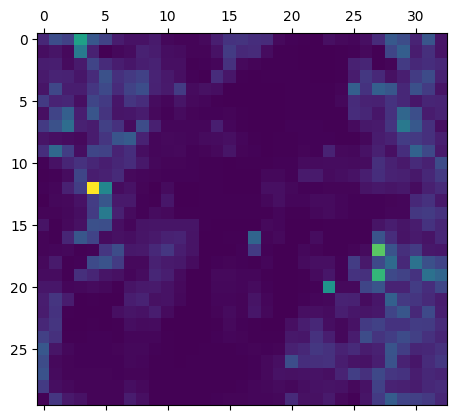

In [404]:
plt.matshow(A[:, 106].reshape(CH, CW))

In [414]:
coarse_gdf.

,cell_idx,geometry
0,"0,0","POLYGON ((126.77405 37.42316, 126.77403 37.432..."
1,"0,1","POLYGON ((126.78535 37.42318, 126.78532 37.432..."
2,"0,2","POLYGON ((126.79665 37.42320, 126.79662 37.432..."
3,"0,3","POLYGON ((126.80794 37.42322, 126.80792 37.432..."
4,"0,4","POLYGON ((126.81924 37.42324, 126.81922 37.432..."
...,...,...
1173,"30,33","POLYGON ((127.14740 37.69358, 127.14742 37.702..."
1174,"30,34","POLYGON ((127.15874 37.69357, 127.15876 37.702..."
1175,"30,35","POLYGON ((127.17007 37.69355, 127.17009 37.702..."
1176,"30,36","POLYGON ((127.18141 37.69354, 127.18143 37.702..."


Index(['A-01-I', 'A-01-O', 'A-02-I', 'A-02-O', 'A-03-I', 'A-03-O', 'A-04-I',
       'A-04-O', 'A-05-I', 'A-05-O', 'A-06-I', 'A-06-O', 'A-07-I', 'A-07-O',
       'A-08-I', 'A-08-O', 'A-09-I', 'A-09-O', 'A-10-I', 'A-10-O', 'A-11-I',
       'A-11-O', 'A-12-I', 'A-12-O', 'A-13-I', 'A-13-O', 'A-14-I', 'A-14-O',
       'A-15-I', 'A-15-O', 'A-16-I', 'A-16-O', 'A-17-I', 'A-17-O', 'A-18-I',
       'A-18-O', 'A-19-I', 'A-19-O', 'A-20-I', 'A-20-O', 'A-21-I', 'A-21-O',
       'A-22-I', 'A-22-O', 'A-23-I', 'A-23-O', 'A-24-I', 'A-24-O'],
      dtype='object')

In [442]:
sensor_gdf

,지점번호,지점명칭,위도,경도,주소,도로명 주소,유입방향,유입링크,유출방향,유출링크,geometry
0,A-01,성산로(금화터널),37.568588,126.948436,서울시 서대문구 신촌동 1-142,NaN,[성산로]봉원고가차도->독립문역,1120006400,[성산로]독립문역->봉원고가차도,1120006300,POINT (126.94844 37.56859)
1,A-02,사직로(사직터널),37.572298,126.962853,서울시 종로구 행촌동 1-186,NaN,[사직로]독립문역->사직단,1000008000,[사직로]사직단->독립문역,1000007900,POINT (126.96285 37.57230)
2,A-03,자하문로(자하문터널),37.588831,126.968548,서울시 종로구 청운동 24-6,NaN,[자하문로]석파정->청운초등학교,1000019500,[자하문로]청운초등학교->석파정,1000019600,POINT (126.96855 37.58883)
3,A-04,대사관로(삼청터널),37.596359,126.984209,서울시 성북구 성북동 산25-148,NaN,[삼청로]삼청각->삼청공원입구,1000020100,[삼청로]삼청공원입구->삼청각,1000020200,POINT (126.98421 37.59636)
4,A-05,율곡로(안국역),37.576000,126.984342,서울시 종로구 경운동 90-4,서울시 종로구 율곡로 46,[율곡로]안국역->안국동사거리,1000012700,[율곡로]안국동사거리->안국역,1000012800,POINT (126.98434 37.57600)
5,A-06,창경궁로(서울여자대학교),37.582526,126.998011,서울시 종로구 명륜4가 197-5,NaN,[창경궁로]성균관대입구->원남동사거리,1000015500,[창경궁로]원남동사거리->성균관대입구,1000015600,POINT (126.99801 37.58253)
6,A-07,대학로(한국방송통신대학교),37.578188,127.002053,서울시 종로구 연건동 72-3,NaN,[대학로]혜화동로터리->이화사거리,1000015900,[대학로]이화사거리->혜화동로터리,1000016000,POINT (127.00205 37.57819)
7,A-08,종로(동묘앞역),37.573262,127.017112,서울시 종로구 숭인동 273,서울시 종로구 종로 358,[종로]신설동역->동묘앞역,1000002300,[종로]동묘앞역->신설동역,1000002400,POINT (127.01711 37.57326)
8,A-09,퇴계로(신당역),37.565712,127.020912,서울시 중구 황학동 710,서울시 중구 퇴계로 443,[퇴계로]상왕십리역->신당역,1010013200,[퇴계로]신당역->상왕십리역,1010013100,POINT (127.02091 37.56571)
9,A-10,동호로(장충체육관),37.558563,127.007101,서울시 중구 장충동2가 200-99,서울시 중구 동호로 233-1,[동호로]약수역->장충체육관,1010001600,[동호로]장충체육관->약수역,1010001500,POINT (127.00710 37.55856)


In [453]:
with open(pjoin(pdir, 'coarse_idx.csv'), 'w') as fp:
    fp.write('sensor_id,y,x\n')
    for i in range(len(sensor_df.columns)):
        sensor_name = sensor_df.columns[i]
        msensor = sensor_gdf[sensor_gdf['지점번호'] == sensor_name[:-2]].iloc[0]
        fp.write(f'{i},' + coarse_gdf[coarse_gdf.intersects(msensor.geometry)].iloc[0].cell_idx + '\n')

In [454]:
df = pd.read_csv(pjoin(pdir, 'coarse_idx.csv'))

In [455]:
df

,sensor_id,y,x
0,0,16,16
1,1,16,16
2,2,16,17
3,3,16,17
4,4,18,18
5,5,18,18
6,6,19,19
7,7,19,19
8,8,16,19
9,9,16,19


In [438]:
for _, item in df.iterrows():
    print(item)

sensor_id     0
y            16
x            16
Name: 0, dtype: int64
sensor_id     1
y            16
x            17
Name: 1, dtype: int64
sensor_id     2
y            18
x            18
Name: 2, dtype: int64
sensor_id     3
y            19
x            19
Name: 3, dtype: int64
sensor_id     4
y            16
x            19
Name: 4, dtype: int64
sensor_id     5
y            17
x            20
Name: 5, dtype: int64
sensor_id     6
y            17
x            21
Name: 6, dtype: int64
sensor_id     7
y            16
x            22
Name: 7, dtype: int64
sensor_id     8
y            15
x            22
Name: 8, dtype: int64
sensor_id     9
y            15
x            21
Name: 9, dtype: int64
sensor_id    10
y            14
x            21
Name: 10, dtype: int64
sensor_id    11
y            14
x            18
Name: 11, dtype: int64
sensor_id    12
y            14
x            18
Name: 12, dtype: int64
sensor_id    13
y            16
x            18
Name: 13, dtype: int64
sensor_id    14
